# Libraries 

In [68]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
from sklearn.metrics import mean_squared_error


# Load Data set 

In [69]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    print(df.head()) 
    return df
df=read_csv('fundamentals.csv')

   Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4           4           AAP    2012-12-29      2.409453e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   
1          -93000000.0               -2.723000e+09           67.0   
2         -160000000.0               -1.500000e+08          143.0   
3          352000000.0               -7.080000e+08          135.0   
4          -89482000.0                6.000000e+05           32.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
0         -1.888000e+09     4.695000e+09        53.0  ...   
1         -3.114000e+09     1.059200e+10        75.0  ...   
2         -5.311000e+09

# Clasify Columns

In [70]:
def classify_columns(data_frame):
    categorical_columns = data_frame.select_dtypes(include=['object']).columns
    numeric_columns = data_frame.select_dtypes(include=['int64', 'float64']).columns
    return list(categorical_columns), list(numeric_columns)
categorical_columns, numeric_columns = classify_columns(df)

In [71]:
print("categorial Column",categorical_columns)
print("Numaric Column",numeric_columns)


categorial Column ['Ticker Symbol', 'Period Ending']
Numaric Column ['Unnamed: 0', 'Accounts Payable', 'Accounts Receivable', "Add'l income/expense items", 'After Tax ROE', 'Capital Expenditures', 'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks', 'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges', 'Depreciation', 'Earnings Before Interest and Tax', 'Earnings Before Tax', 'Effect of Exchange Rate', 'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets', 'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax', 'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments', 'Liabilities', 'Long-Term Debt', 'Long-Term Investments', 'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow', 'Net Cash Flow-Operating', 'Net Cash Flows-Financing', 'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments', 'Net Income Applicable to Common Shareholders', 'Net Incom

# Preprocess data 

In [72]:
def preprocess_data(data_frame):

    data_frame = data_frame.drop_duplicates()
    for col in data_frame.columns:
        if data_frame[col].dtype == 'object':
            data_frame[col].fillna(data_frame[col].mode()[0], inplace=True)
        else:
            data_frame[col].fillna(data_frame[col].median(), inplace=True)
    categorical_columns, numeric_columns = classify_columns(data_frame)
    if categorical_columns:
        label_encoders = {}
        for col in categorical_columns:
            label_encoders[col] = LabelEncoder()
            data_frame[col] = label_encoders[col].fit_transform(data_frame[col])
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_frame[numeric_columns])
    categorical_data = pd.DataFrame(data_frame[categorical_columns].values, columns=categorical_columns)
    numeric_data = pd.DataFrame(scaled_data, columns=numeric_columns)
    processed_data = pd.concat([categorical_data, numeric_data], axis=1)

    return processed_data, scaler


In [73]:
processed_data, scaler = preprocess_data(df)
df['Target'] = df['Total Revenue'].shift(-1)
print("\nDataFrame with Target Variable:")
df


DataFrame with Target Variable:


C:\Users\mahma\AppData\Local\Temp\ipykernel_7664\3949533717.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame[col].fillna(data_frame[col].median(), inplace=True)
C:\Users\mahma\AppData\Local\Temp\ipykernel_7664\3949533717.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding,Target
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08,2.674300e+10
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08,4.265000e+10
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08,4.099000e+10
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08,6.205003e+09
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07,6.493814e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1776,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,...,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08,4.561000e+09
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,...,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08,4.785000e+09
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,...,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08,4.765000e+09
1779,1779,ZTS,2015-12-31,1.313000e+09,-58000000.0,-8.100000e+07,32.0,-2.240000e+08,1.012000e+09,65.0,...,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08,4.888000e+09


# Fill Missing Values 

In [74]:
df_filled = df.fillna(method='ffill') 

C:\Users\mahma\AppData\Local\Temp\ipykernel_7664\14039694.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


# Feature Selection 

In [75]:
import pandas as pd

def select_features(data_frame, target_column, k):
    data_frame.columns = data_frame.columns.str.strip()
    if target_column not in data_frame.columns:
        raise ValueError("Target column '{}' not found in DataFrame.".format(target_column))
    numeric_columns = data_frame.select_dtypes(include=['number']).columns
    correlation_matrix = data_frame[numeric_columns].corr()
    target_correlation = correlation_matrix[target_column].abs().sort_values(ascending=False)
    selected_features = target_correlation[1:k+1].index  
    selected_data = data_frame[selected_features]
    selected_data[target_column] = data_frame[target_column]
    
    return selected_data
selected_features_df = select_features(df, 'Target', 10)


C:\Users\mahma\AppData\Local\Temp\ipykernel_7664\663402131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[target_column] = data_frame[target_column]


In [76]:

selected_features_df

,Total Revenue,Cost of Revenue,Gross Profit,Total Current Liabilities,Income Tax,"Sales, General and Admin.",Earnings Before Tax,Earnings Before Interest and Tax,Inventory,Net Income-Cont. Operations,Target
0,2.485500e+10,1.049900e+10,1.435600e+10,9.011000e+09,-5.690000e+08,1.297700e+10,-2.445000e+09,-1.813000e+09,5.800000e+08,-4.084000e+09,2.674300e+10
1,2.674300e+10,1.101900e+10,1.572400e+10,1.380600e+10,-3.460000e+08,1.291300e+10,-2.180000e+09,-1.324000e+09,1.012000e+09,-4.489000e+09,4.265000e+10
2,4.265000e+10,1.562000e+10,2.703000e+10,1.340400e+10,3.300000e+08,2.068600e+10,3.212000e+09,4.099000e+09,1.004000e+09,2.882000e+09,4.099000e+10
3,4.099000e+10,1.109600e+10,2.989400e+10,1.360500e+10,-2.994000e+09,2.127500e+10,4.616000e+09,5.496000e+09,8.630000e+08,7.610000e+09,6.205003e+09
4,6.205003e+09,3.106967e+09,3.098036e+09,2.559638e+09,2.364040e+08,2.440721e+09,6.240740e+08,6.579150e+08,2.308609e+09,3.876700e+08,6.493814e+09
...,...,...,...,...,...,...,...,...,...,...,...
1776,2.210591e+09,4.934400e+07,0.000000e+00,0.000000e+00,1.423880e+08,1.591239e+09,4.518590e+08,5.207260e+08,0.000000e+00,3.094710e+08,4.561000e+09
1777,4.561000e+09,1.669000e+09,2.892000e+09,1.415000e+09,1.870000e+08,1.613000e+09,6.900000e+08,8.030000e+08,1.293000e+09,5.040000e+08,4.785000e+09
1778,4.785000e+09,1.717000e+09,3.068000e+09,1.086000e+09,2.330000e+08,1.643000e+09,8.200000e+08,9.370000e+08,1.289000e+09,5.830000e+08,4.765000e+09
1779,4.765000e+09,1.738000e+09,3.027000e+09,1.781000e+09,2.060000e+08,1.532000e+09,5.450000e+08,6.690000e+08,1.467000e+09,3.390000e+08,4.888000e+09


# PLots TO check Outliers

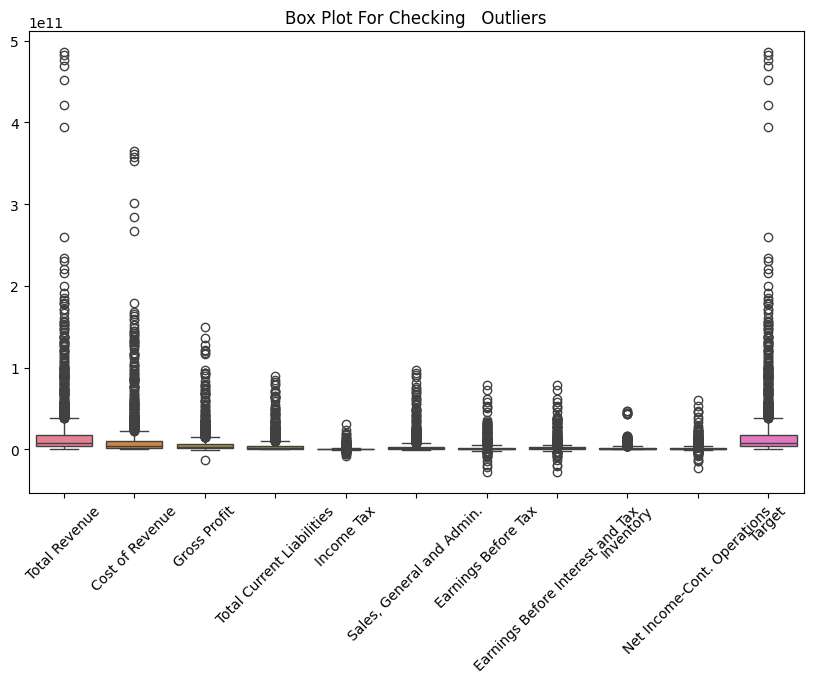

In [77]:
def plot_box_plots(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot For Checking   Outliers")
    plt.xticks(rotation=45)
    plt.show()
plot_box_plots(selected_features_df)

# Remove Outliers

In [78]:
def remove_outliers_all(data_frame, threshold=1.5):
    cleaned_data = data_frame.copy()
    for column in cleaned_data.columns:
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_cutoff = Q1 - threshold * IQR
        upper_cutoff = Q3 + threshold * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_cutoff) & (cleaned_data[column] <= upper_cutoff)]
    
    return cleaned_data


In [79]:
for _ in range(1000):
    selected_data_frame = remove_outliers_all(selected_features_df)
print(selected_data_frame.head())

    Total Revenue  Cost of Revenue  Gross Profit  Total Current Liabilities  \
24   4.055240e+09      586557000.0  3.468683e+09               1.525648e+09   
25   4.147065e+09      622080000.0  3.524985e+09               2.494435e+09   
26   4.795511e+09      744317000.0  4.051194e+09               2.213556e+09   
27   5.854430e+09      819908000.0  5.034522e+09               2.811635e+09   
28   2.633689e+09      941278000.0  1.692411e+09               5.705120e+08   

     Income Tax  Sales, General and Admin.  Earnings Before Tax  \
24   66156000.0               2.140578e+09         3.561410e+08   
25   92981000.0               2.195640e+09         3.613760e+08   
26  244230000.0               2.215161e+09         8.737810e+08   
27  266356000.0               2.487907e+09         1.435138e+09   
28  141836000.0               3.962330e+08         8.153230e+08   

    Earnings Before Interest and Tax    Inventory  \
24                      4.236490e+08          0.0   
25              

# Cleaned DATA

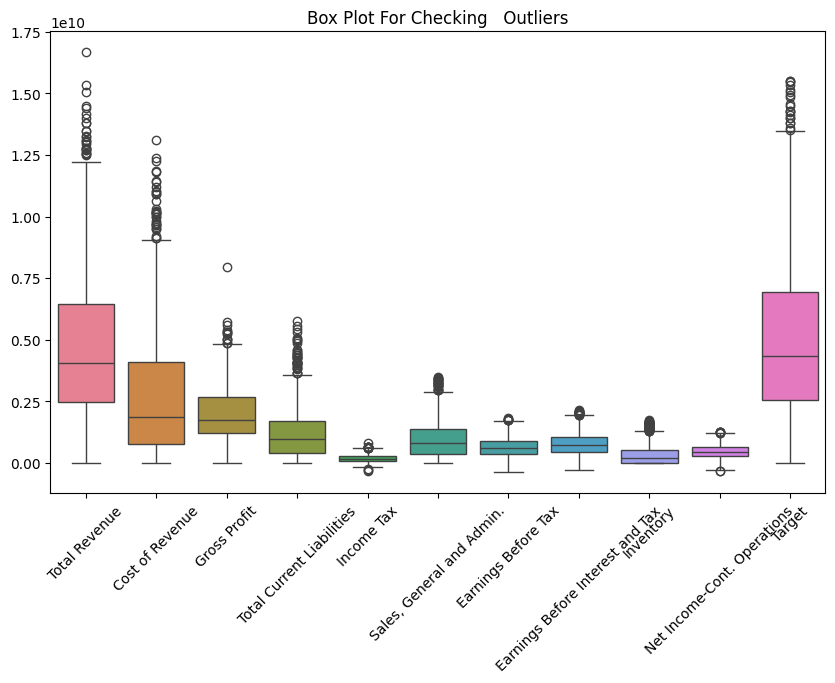

In [80]:
plot_box_plots(selected_data_frame)

# ---------------------------------------LSTM ------------------------------

# Split DATA

In [81]:
def split_data(processed_data, target_column):
    X = processed_data.drop(columns=[target_column])
    y = processed_data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Built Model 

In [82]:
X_train, X_test, y_train, y_test = split_data(selected_data_frame, 'Target')
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

c:\Users\mahma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 40006953233559846912.0000
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37890191039951536128.0000
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39260925798020808704.0000
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40890252496803463168.0000
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41724773026192424960.0000
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35301357927004110848.0000
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39123438466037186560.0000
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38267125616185704448.0000
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40096022471502725120.0000
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37358080188666085376.0000
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37026735762566021120.0000
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 403545572376114

# Reshape the Data For LSTM Syntex

In [83]:
def reshape_and_print_shapes(X_train_scaled, X_test_scaled, y_train, y_test, y_pred):
    y_train_array = y_train.to_numpy()
    y_test_array = y_test.to_numpy()
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
    y_train_reshaped = y_train_array.reshape(-1, 1)
    y_test_reshaped = y_test_array.reshape(-1, 1)
    y_pred_reshaped = y_pred.reshape(-1, 1)

    # Print shapes
    print("X_train_reshaped shape:", X_train_reshaped.shape)
    print("X_test_reshaped shape:", X_test_reshaped.shape)
    print("y_train_reshaped shape:", y_train_reshaped.shape)
    print("y_test_reshaped shape:", y_test_reshaped.shape)
    print("y_pred_reshaped shape:", y_pred_reshaped.shape)
    return X_train_reshaped,X_test_reshaped,y_train_reshaped, y_test_reshaped,y_pred_reshaped
y_pred = model.predict(X_test_reshaped)
X_train_reshaped,X_test_reshaped,y_train_reshaped, y_test_reshaped,y_pred_reshaped=reshape_and_print_shapes(X_train_scaled, X_test_scaled, y_train, y_test, y_pred)



6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step
X_train_reshaped shape: (679, 1, 10)
X_test_reshaped shape: (170, 1, 10)
y_train_reshaped shape: (679, 1)
y_test_reshaped shape: (170, 1)
y_pred_reshaped shape: (170, 1)


# MSE WVALUATION 

In [84]:

y_pred_reshaped = y_pred_reshaped.reshape(-1, 1)
mse = mean_squared_error(y_test_reshaped, y_pred_reshaped)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 3.428584822518631e+19


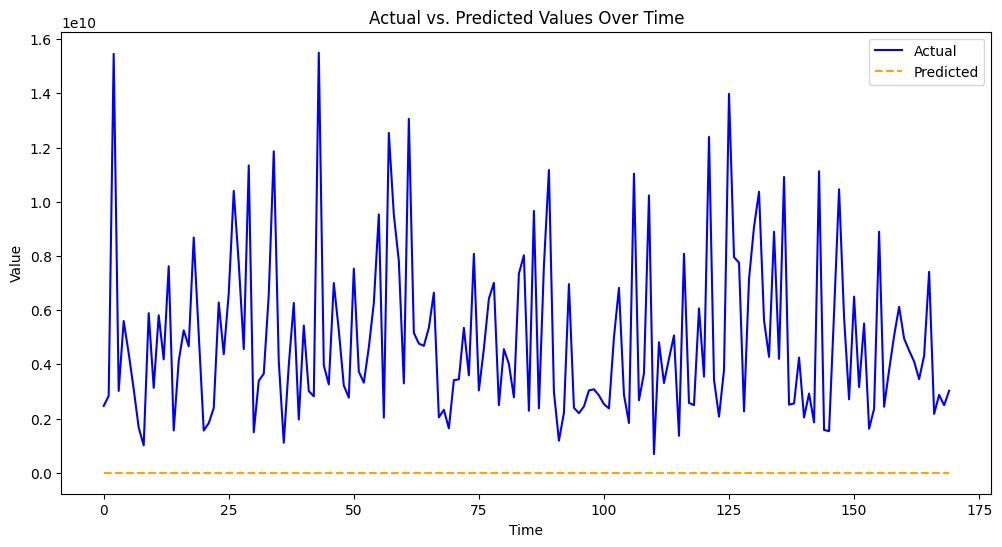

In [85]:

plt.figure(figsize=(12, 6))
plt.plot(y_test_reshaped, label='Actual', color='blue')
plt.plot(y_pred_reshaped, label='Predicted', color='orange', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values Over Time')
plt.legend()
plt.show()

